In [0]:
!apt -qq install proj-bin libproj-dev libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

In [0]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

from google.colab import files

from mpl_toolkits.basemap import Basemap
from matplotlib import animation
import matplotlib.pyplot as plt
%matplotlib inline

from bz2 import BZ2File
from io import BytesIO

import seaborn as sns

## 設定 Google Drive

In [0]:
!pip install -q PyDrive

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

### 授權 Google SDK

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## 請將本機端的資料 `300k.csv.bz2` 上傳到 colab 環境

In [4]:
if not os.path.exists("300k.csv.bz2"):
    uploaded = files.upload()

Saving 300k.csv.bz2 to 300k.csv.bz2


## 開啟資料檔，存放到變數 `pkgo`

In [0]:
# csv_bz2 = BZ2File('./300k.csv.bz2', mode='r')
# csv_file = BytesIO(csv_bz2.read())
pkgo = pd.read_csv('./300k.csv.bz2', low_memory=False)

# Exploratory Data Analysis

## 觀察 `pkgo` 的前 5 筆資料

In [0]:
pd.set_option('display.max_columns', pkgo.shape[-1])
pkgo.head(5)

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,9645139130992034000,9645138924833604000,night,5,57,dummy_day,8,8,2016,14,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,fog,436,7,16,941,1181,19,41,-196,2431.2341,True,True,True,False,0.049869,True,True,True,True,True,True,0.081776,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,9645139130992034000,9645138924833604000,night,5,57,dummy_day,8,8,2016,14,False,Mexico_City,America,Foggy,25.5,4.79,269,1018.02,fog,436,7,16,941,1181,19,41,-196,2431.2341,True,True,True,False,0.259156,False,False,True,True,True,True,0.195622,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Fal

In [0]:
print('pkgo 一共有 {} 筆資料樣本，{} 個資料欄位'.format(pkgo.shape[0], pkgo.shape[1]))

pkgo 一共有 296021 筆資料樣本，208 個資料欄位


## 寶可夢出現的位置

In [0]:
pkgo[['city', 'latitude', 'longitude']].head(10)

,city,latitude,longitude
0,Mexico_City,20.525745,-97.460829
1,Mexico_City,20.523695,-97.461167
2,New_York,38.903590,-77.199780
3,Los_Angeles,47.665903,-122.312561
4,Los_Angeles,47.666454,-122.311628
5,Perth,-31.954980,115.853609
6,Perth,-31.954245,115.852038
7,Chicago,26.235257,-98.197591
8,Mexico_City,20.525554,-97.458800
9,New_York,32.928558,-84.340278


## 只看表格不是那麼清楚，從地圖來了解寶可夢出沒的地方

In [0]:
def map_plot(pkgo):
    plt.figure(1, figsize=(20,10))
    m1 = Basemap(projection='merc',
                 llcrnrlat=-60,
                 urcrnrlat=65,
                 llcrnrlon=-180,
                 urcrnrlon=180,
                 lat_ts=0,
                 resolution='c')

    m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
    m1.drawmapboundary(fill_color='#000000')                # black background
    m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

    # Plot the data
    x, y = m1(pkgo.longitude.tolist(), pkgo.latitude.tolist())
    m1.scatter(x,y, s=3, c="#99ccff", lw=0, alpha=1, zorder=5)
    plt.title("Pokemon activity")
    plt.show()

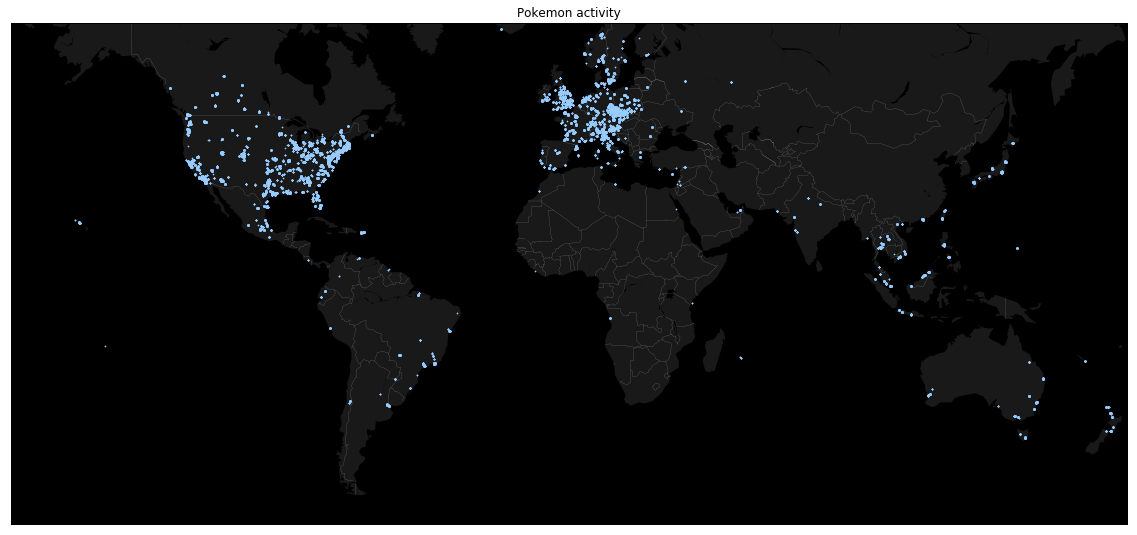

In [0]:
map_plot(pkgo)

## 我們把範圍縮小到紐約市

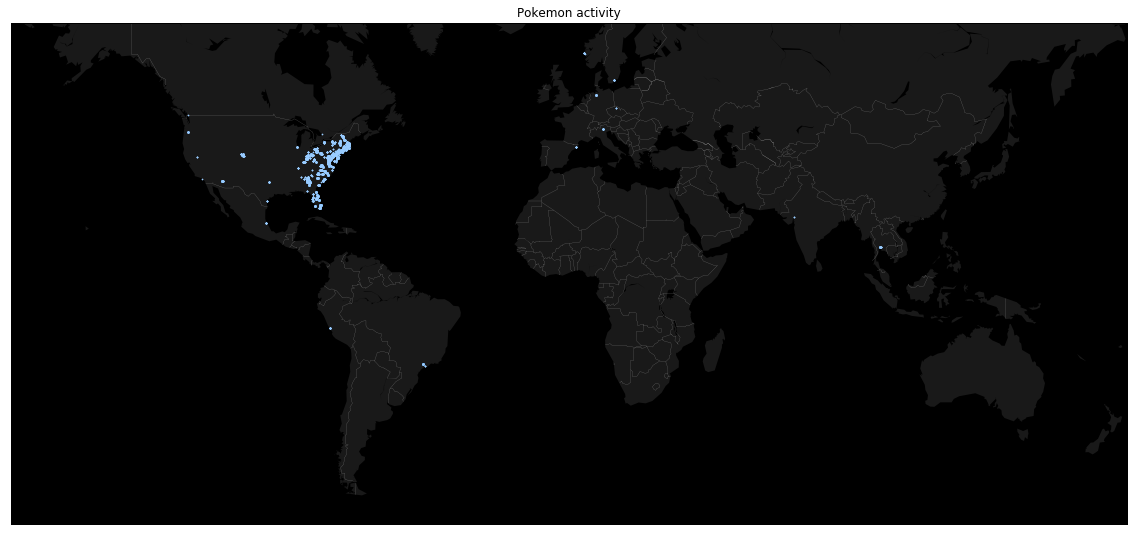

In [0]:
pkgo = pkgo[pkgo.city=='New_York']
map_plot(pkgo)

## 莊家作弊？讓我們從經緯度的分佈來看看

### 經度分佈

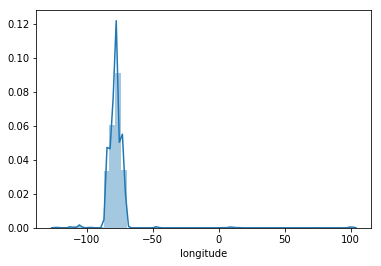

In [0]:
sns.distplot(pkgo['longitude'])

### 緯度分佈

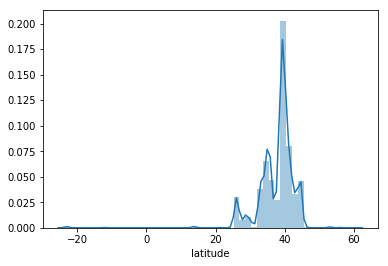

In [0]:
sns.distplot(pkgo['latitude'])

### 經緯度平面圖

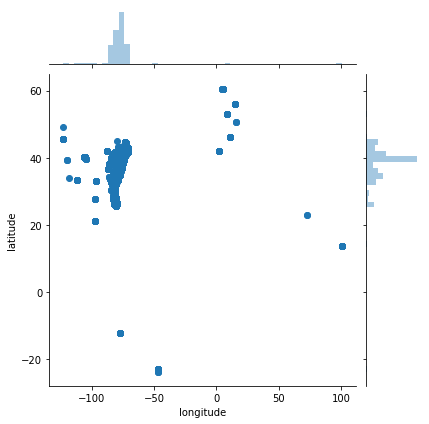

In [0]:
sns.jointplot(x='longitude', y='latitude', data=pkgo)

### 設定經緯度範圍，將資料集縮限在 New York 市周遭

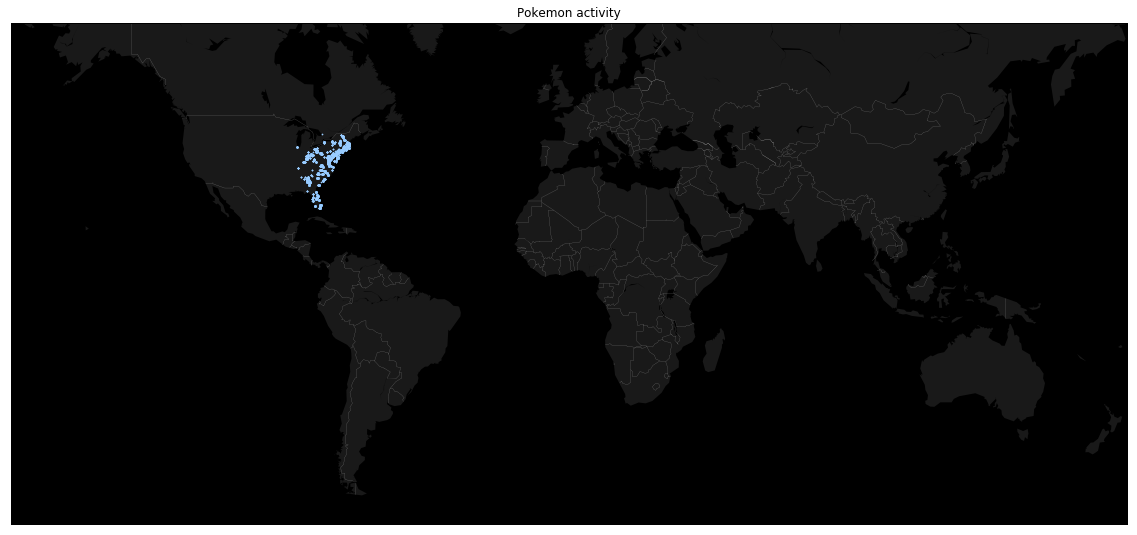

In [0]:
pkgo = pkgo[ (-90 < pkgo['longitude']) & (pkgo['longitude'] < -50) & 
            (20 < pkgo['latitude']) & (pkgo['latitude']< 50)]

map_plot(pkgo)

## 留下 5 種寶可夢

In [0]:
pkgo['class'].max()

149

In [0]:
pd.set_option('display.max_rows', 50)
pkgo.groupby('class').count().sort_values(by=['pokemonId'], ascending=False).head(15)

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736,9736
19,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,7979,797

In [0]:
# 小火龍(No.04)、走路草(No.43)、猴怪(No.56)、口呆花(No.71)、大鉗蟹(No.98)
# pokemons = [pkgo[pkgo['class']==(i-1)] for i in [4, 43, 56, 71, 98]]
pokemons = [pkgo[pkgo['class']==i] for i in [32, 43, 54, 69, 29]]
pkgo = pd.concat(pokemons)

### 修改分類數字

In [0]:
# class_mapping = {4: 0, 43: 1, 56: 2, 71: 3, 98: 4}
# class_mapping = {10: 0, 48: 1, 129: 2, 41: 3, 46: 4}
class_mapping = {32: 0, 43: 1, 54: 2, 69: 3, 29: 4}
pkgo['class'] = pkgo['class'].map(class_mapping)

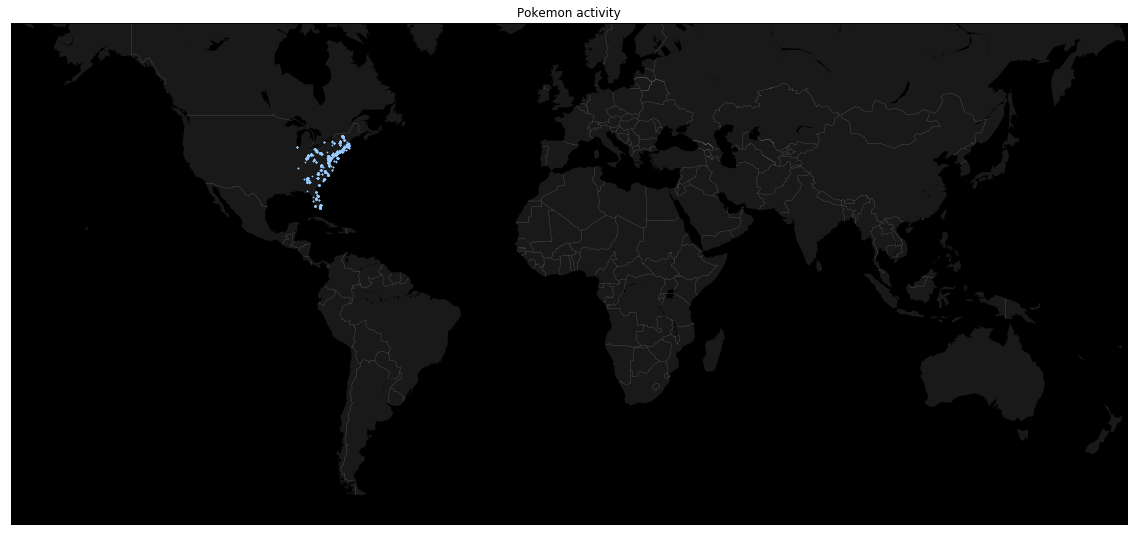

In [0]:
map_plot(pkgo)

In [0]:
print('剩下的 pkgo 資料，一共有 {} 筆樣本，{} 個資料欄位'.format(pkgo.shape[0], pkgo.shape[1]))

剩下的 pkgo 資料，一共有 4582 筆樣本，208 個資料欄位


In [0]:
pkgo.head()

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
444,32,39.416909,-77.419590,2016-09-08T02:43:24,OTk4OTgyNzIzMDA5MzU4OTkzMw==,9928706908699492000,9928706908632383000,9928706908900819000,9928706912122044000,9928706907827077000,9928706890647208000,9928706821927731000,night,4,43,dummy_day,8,8,2016,14,False,New_York,America,Clear,24.3,2.79,198,1015.29,clear-night,405,6,45,1016,1172,19,32,-249,849.44226,True,True,True,False,0.143733,False,True,True,True,True,True,0.111388,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
508,32,38.794826,-76.978933,2016-09-08T02:35:03,OTI1MDIzMzE3NDAzNTk0MjQxMw==,9923605871068185000,9923605871001076000,9923605870732640000,9923605873953866000,9923605861068964000,9923605843889095000,9923605637730664000,night,4,35,dummy_day,8,8,2016,13,False,New_York,America,PartlyCloudy,24.5,6.78,239,1015.37,partly-cloudy-night,404,6,44,953,1170,19,30,-187,214.14536,False,False,True,False,1.269117,False,False,False,False,True,True,0.975192,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

# 處理 pkgo 資料，方便 Deep Learning 訓練

### 觀察 `appearedLocalTime` 的格式

In [0]:
appearedLocalTime = pkgo['appearedLocalTime'].tolist()
appearedLocalTime[0]

'2016-09-08T02:43:24'

### 將 appearedLocalTime 分解為 年、月、日、時、分、秒

In [0]:
appearedLocalTime = pkgo['appearedLocalTime'].tolist()

year_list = []
month_list = []
day_list = []
hour_list = []
minute_list = []
second_list = []

for datetime in appearedLocalTime:
    date, time = datetime.split('T')
    year, month, day = date.split('-')
    hour, minute, second = time.split(':')
    year_list.append(year)
    month_list.append(month)
    day_list.append(day)
    hour_list.append(hour)
    minute_list.append(minute)
    second_list.append(second)

#### 年跟月是完全重覆的資料，對我們沒有用

In [0]:
print(set(year_list))
print(set(month_list))
print(set(day_list))

{'2016'}
{'09'}
{'07', '08', '03', '04', '06', '05', '02'}


#### 只插入 `appearedLocalTime` 的 `day`、`hour`、`minute`、`second` 到 `pkgo` 裡

In [0]:
pkgo['appearedLocalTime_day'] = pd.Series(day_list, index=pkgo.index)
pkgo['appearedLocalTime_hour'] = pd.Series(hour_list, index=pkgo.index)
pkgo['appearedLocalTime_minute'] = pd.Series(minute_list, index=pkgo.index)
pkgo['appearedLocalTime_second'] = pd.Series(second_list, index=pkgo.index)

In [0]:
pd.set_option('display.max_columns', 10)
pkgo.head(5)

,pokemonId,latitude,longitude,appearedLocalTime,_id,...,class,appearedLocalTime_day,appearedLocalTime_hour,appearedLocalTime_minute,appearedLocalTime_second
444,32,39.416909,-77.419590,2016-09-08T02:43:24,OTk4OTgyNzIzMDA5MzU4OTkzMw==,...,0,08,02,43,24
508,32,38.794826,-76.978933,2016-09-08T02:35:03,OTI1MDIzMzE3NDAzNTk0MjQxMw==,...,0,08,02,35,03
838,32,44.491219,-73.183918,2016-09-08T02:23:57,NzgzMzkzNTQ3OTY3NzM0Njc2NQ==,...,0,08,02,23,57
894,32,44.479229,-73.214340,2016-09-08T02:22:38,NDIwOTcwNjc2NzQxMDExNTQ1Mw==,...,0,08,02,22,38
1108,32,42.325273,-71.584960,2016-09-08T02:17:42,MTI5ODAxODIxMjkwMjg5MzI3NjU=,...,0,08,02,17,42


In [0]:
pkgo.shape

(4582, 212)

### 捨棄不用的欄位

In [0]:
pkgo = pkgo.drop(columns=['pokemonId', '_id',
    'appearedLocalTime', 'appearedYear', 'appearedMonth', 
    'cellId_90m', 'cellId_180m', 'cellId_370m', 'cellId_730m',
    'cellId_1460m', 'cellId_2920m', 'cellId_5850m',
    'city', 'weatherIcon', 'continent'])

In [0]:
pd.set_option('display.max_columns', pkgo.shape[-1])
pkgo.head(5)

,latitude,longitude,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,terrainType,closeToWater,weather,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,appearedLocalTime_day,appearedLocalTime_hour,appearedLocalTime_minute,appearedLocalTime_second
444,39.416909,-77.419590,night,4,43,dummy_day,8,14,False,Clear,24.3,2.79,198,1015.29,405,6,45,1016,1172,19,32,-249,849.44226,True,True,True,False,0.143733,False,True,True,True,True,True,0.111388,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,08,02,43,24
508,38.794826,-76.978933,night,4,35,dummy_day,8,13,False,PartlyCloudy,24.5,6.78,239,1015.37,404,6,44,953,1170,19,30,-187,214.14536,False,False,True,False,1.269117,False,False,False,False,True,True,0.975192,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

### 將 True 和 False 轉換成 1 和 0

In [0]:
pkgo = pkgo.replace({True: 1, False: 0})

pd.set_option('display.max_columns', pkgo.shape[-1])
pkgo.head(5)

,latitude,longitude,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,terrainType,closeToWater,weather,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,appearedLocalTime_day,appearedLocalTime_hour,appearedLocalTime_minute,appearedLocalTime_second
444,39.416909,-77.419590,night,4,43,dummy_day,8,14,0,Clear,24.3,2.79,198,1015.29,405,6,45,1016,1172,19,32,-249,849.44226,1,1,1,0,0.143733,0,1,1,1,1,1,0.111388,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,08,02,43,24
508,38.794826,-76.978933,night,4,35,dummy_day,8,13,0,PartlyCloudy,24.5,6.78,239,1015.37,404,6,44,953,1170,19,30,-187,214.14536,0,0,1,0,1.269117,0,0,0,0,1,1,0.975192,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,08,02,35,03
838,44.491219,-73.183918,night,4,23,dummy_day,8,13,1,Clear,21.8,4.22,146,1013.77,384,6,24,1037,1159,19,19,-262,256.71356,0,0,1,0,0.054097,1,1,1,1,1,1,0.17169,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,08,02,23,57
894,44.479229,-73.214340,night,4,22,dummy_day,8,13,1,Clear,21.8,4.22,146,1013.77,384,6,24,1037,1159,19,19,-262,591.08990,0,1,1,0,0.420341,0,0,1,1,1,1,0.122263,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,08,02,22,38
1108,42.325273,-71.584960,night,4,17,dummy_day,8,5,0,Clear,20.3,5.63,15,1016.15,379,6,19,1008,1151,19,11,-236,880.80930,1,1,1,0,21.719945,0,0,0,0,0,0,

## Encoding

### Label encoding to `appearedTimeOfDay`

In [0]:
set(pkgo['appearedTimeOfDay'])

{'afternoon', 'evening', 'morning', 'night'}

In [0]:
label_map = {'morning': 1, 'afternoon': 2, 'evening': 3, 'night': 4}
pkgo['appearedTimeOfDay'] = pkgo['appearedTimeOfDay'].map(label_map)

### Label encoding to `weather` - method 1

In [0]:
pkgo['weather'].unique()

array(['Clear', 'PartlyCloudy', 'MostlyCloudy', 'Rain', 'Drizzle',
       'Overcast', 'Breezy', 'BreezyandOvercast', 'LightRainandBreezy',
       'BreezyandPartlyCloudy', 'LightRain', 'DrizzleandBreezy',
       'RainandWindy', 'Foggy', 'HeavyRain', 'Dry'], dtype=object)

### 將天氣分成三大類

Cloudy
* Clear
* PartlyCloudy
* MostlyCloudy
* Overcast

Rain
* Drizzle
* LightRain
* Rain

Windy
* Breezy
* Windy

In [0]:
weather_dummies = pd.get_dummies(pkgo['weather'], prefix='weather')

pd.set_option('display.max_columns', weather_dummies.shape[-1])
weather_dummies.head(5)

,weather_Breezy,weather_BreezyandOvercast,weather_BreezyandPartlyCloudy,weather_Clear,weather_Drizzle,weather_DrizzleandBreezy,weather_Dry,weather_Foggy,weather_HeavyRain,weather_LightRain,weather_LightRainandBreezy,weather_MostlyCloudy,weather_Overcast,weather_PartlyCloudy,weather_Rain,weather_RainandWindy
444,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
838,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
894,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1108,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# ones = np.zeros(pkgo.shape[0], dtype=np.int)
# weather = pd.DataFrame(data={'Cloudy': ones, 'Rain': ones, 'Windy': ones}, index=pkgo.index)
# # Cloudy
# index = weather_dummies['weather_Clear'] == 1
# weather['Cloudy'][index.values] = 1
# index = weather_dummies['weather_PartlyCloudy'] == 1
# weather['Cloudy'][index.values] = 2
# index = weather_dummies['weather_MostlyCloudy'] == 1
# weather['Cloudy'][index.values] = 3
# index = weather_dummies['weather_Overcast'] == 1
# weather['Cloudy'][index.values] = 4

# # Rain
# index = weather_dummies['weather_Drizzle'] == 1
# weather['Rain'][index.values] = 1
# index = weather_dummies['weather_LightRain'] == 1
# weather['Rain'][index.values] = 2
# index = weather_dummies['weather_Rain'] == 1
# weather['Rain'][index.values] = 3

# # Windy
# index = weather_dummies['weather_Breezy'] == 1
# weather['Windy'][index.values] = 1

# # Hybrid
# index = weather_dummies['weather_LightRainandBreezy'] == 1
# weather['Rain'][index.values] = 2
# weather['Windy'][index.values] = 1
# index = weather_dummies['weather_DrizzleandBreezy'] == 1
# weather['Rain'][index.values] = 1
# weather['Windy'][index.values] = 1
# index = weather_dummies['weather_BreezyandPartlyCloudy'] == 1
# weather['Cloudy'][index.values] = 2
# weather['Windy'][index.values] = 1
# index = weather_dummies['weather_RainandWindy'] == 1
# weather['Rain'][index.values] = 3
# weather['Windy'][index.values] = 2

# weather.head()

# pkgo = pd.concat([pkgo, weather], axis=1)
# pkgo = pkgo.drop(columns='weather')

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(pkgo['weather'].unique())
list(le.classes_)
pkgo['weather'] = le.transform(pkgo['weather'].values)

### Label encoding to `appearedDayOfWeek`

In [0]:
set(pkgo['appearedDayOfWeek'])

{'Friday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'dummy_day'}

In [0]:
label_map = {'dummy_day': 8, 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
pkgo['appearedDayOfWeek'] = pkgo['appearedDayOfWeek'].map(label_map)

In [0]:
pd.set_option('display.max_columns', pkgo.shape[-1])
pkgo.head(20)

,latitude,longitude,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,terrainType,closeToWater,weather,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class,appearedLocalTime_day,appearedLocalTime_hour,appearedLocalTime_minute,appearedLocalTime_second
444,39.416909,-77.419590,4,4,43,8,8,14,0,3,24.3,2.79,198,1015.29,405,6,45,1016,1172,19,32,-249,849.44226,1,1,1,0,0.143733,0,1,1,1,1,1,0.111388,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,08,02,43,24
508,38.794826,-76.978933,4,4,35,8,8,13,0,13,24.5,6.78,239,1015.37,404,6,44,953,1170,19,30,-187,214.14536,0,0,1,0,1.269117,0,0,0,0,1,1,0.975192,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,08,02,35,03
838,44.491219,-73.183918,4,4,23,8,8,13,1,3,21.8,4.22,146,1013.77,384,6,24,1037,1159,19,19,-262,256.71356,0,0,1,0,0.054097,1,1,1,1,1,1,0.17169,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,08,02,23,57
894,44.479229,-73.214340,4,4,22,8,8,13,1,3,21.8,4.22,146,1013.77,384,6,24,1037,1159,19,19,-262,591.08990,0,1,1,0,0.420341,0,0,1,1,1,1,0.122263,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,08,02,22,38
1108,42.325273,-71.584960,4,4,17,8,8,5,0,3,20.3,5.63,15,1016.15,379,6,19,1008,1151,19,11,-236,880.80930,1,1,1,0,21.719945,0,0,0,0,0,0,0.052437,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### 把 `class` 欄位移到最後

In [0]:
cols = pkgo.columns.tolist()
idx = cols.index('class')
col_class = cols.pop(idx)
cols.append(col_class)
pkgo = pkgo[cols]

### 儲存且下載處理過的 `pkgo` 資料集

In [0]:
pkgo.to_csv('pkgo.csv', index=False)
# files.download('pkgo.csv')